**Introduction to DataScience** <br>
**Project** <br>
23I-2622 Dania Waseem <br>
23I-2618 Taiba Tariq <br>
DS A



Importing Libraries and Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score

**Module 1: Data Acquisition and Preprocessing**

1. Data Acquisition

In [ ]:
#loading the file

df = pd.read_json('/content/electronics.json')

print("Column Names")
print(df.columns)
print("-----------------------------------------------------------------")
print("First 5 rows of the data")
print(df.head(5))
print("-----------------------------------------------------------------")
print("Null values ie one marked with NaN")
print(df.isnull().sum())
print("-----------------------------------------------------------------")

Column Names
Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season',
       'Will_Purchase_Next_Month'],
      dtype='object')
-----------------------------------------------------------------
First 5 rows of the data
                            Customer_ID Age  Gender Income_Level  \
0  b81ee6c9-2ae4-48a7-b283-220eaa244f43  40  Female       Medium   
1                                        25    Male         High   
2  fdf79bcd-5908-4c90-8501-570ffb5b7648  57   Other          Low   
3  878dccba-893a-48f9-8d34-6ed394fa3c9c  38  Female       Medium   
4  0af0bd81-73cc-494e-aa5e-75c6d0b6d743  68   Other       Medium   

                                             Address  \
0  43548 Murray Islands Suite 974\

2. Data Cleaning

*handle missing values and address inconsistencies in data format and encoding*

In [ ]:
print("-----------------------------------------------------------------")
print(df.dtypes)
#by looking at dtypes of cols, most are stored as objs so changing that to respective dtype for easier manipulation

print("-----------------------------------------------------------------")

# replacing 'Hidden' and empty strings with NaN
df.replace(['Hidden',""], np.nan, inplace=True)
print(df.isnull().sum())

print("-----------------------------------------------------------------")

missing_percentage = df.isnull().mean() * 100
print(missing_percentage)
#since all percentages are low, (less than 10%) we cannot drop any column (also all cols are imp in this data eda)

print("-----------------------------------------------------------------")


data = pd.read_json('/content/electronics.json')
data.replace(['Hidden',""], np.nan, inplace=True)
#MAKE DATA TYPES ACCORDINGLY

columns_to_change_dtype = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
                    'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score','Month']

for col in columns_to_change_dtype:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(data.dtypes)

print("-----------------------------------------------------------------")

print("Handling Missing values")

data.dropna(subset=['Customer_ID'], inplace=True) # Drop rows with missing values as this is the unique identifier for the data

# Replace missing values in specific columns with 'Unknown' beacuse we cannot guess those values
columns_to_replace_with_unknown = ['Address', 'Product_ID', 'Transaction_ID']
for col in columns_to_replace_with_unknown:
    data[col] = data[col].fillna('Unknown')

# missing numerical values with median
cols_to_fill_with_median = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
                      'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
for col in cols_to_fill_with_median:
    data[col] = data[col].fillna(data[col].median())


# Season-Month
season_to_months = {
    'Winter': [1, 2, 12],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

month_to_season = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}


for index, row in data.iterrows():
    if pd.isnull(row['Season']) and pd.notnull(row['Month']):
        data.at[index, 'Season'] = month_to_season.get(row['Month'], 'Unknown')


for index, row in data.iterrows():
    if pd.isnull(row['Month']) and pd.notnull(row['Season']):
        season = row['Season']
        month_choice = random.choice(season_to_months.get(season, []))
        data.at[index, 'Month'] = month_choice


# Missing Categorical values with mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Income_Level'] = data['Income_Level'].fillna(data['Income_Level'].mode()[0])
data['Product_Category'] = data['Product_Category'].fillna(data['Product_Category'].mode()[0])
data['Brand'] = data['Brand'].fillna(data['Brand'].mode()[0])
data['Product_Category_Preferences'] = data['Product_Category_Preferences'].fillna(data['Product_Category_Preferences'].mode()[0])
data['Year'] = data['Year'].fillna(data['Year'].mode()[0])

# Missing Purchase Dates
data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'], errors='coerce')
median_date = data['Purchase_Date'].median()
data['Purchase_Date'] = data['Purchase_Date'].fillna(median_date)

print("Missing values after cleaning:")
print(data.isnull().sum())


-----------------------------------------------------------------
Customer_ID                      object
Age                              object
Gender                           object
Income_Level                     object
Address                          object
Transaction_ID                   object
Purchase_Date                    object
Product_ID                       object
Product_Category                 object
Brand                            object
Purchase_Amount                  object
Average_Spending_Per_Purchase    object
Purchase_Frequency_Per_Month     object
Brand_Affinity_Score             object
Product_Category_Preferences     object
Month                            object
Year                             object
Season                           object
Will_Purchase_Next_Month          int64
dtype: object
-----------------------------------------------------------------
Customer_ID                      44
Age                              40
Gender                

Outliers

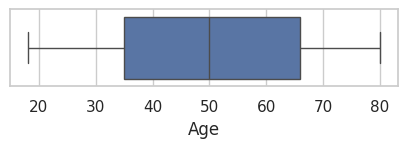

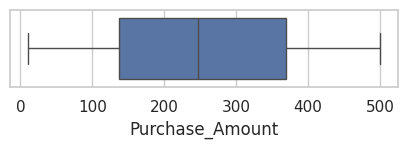

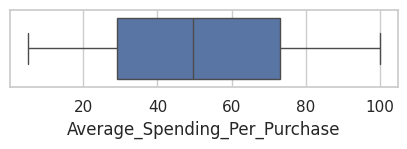

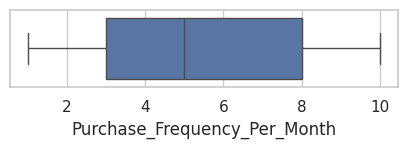

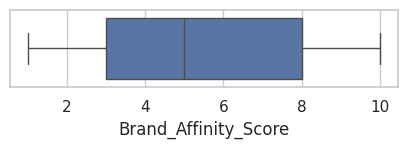

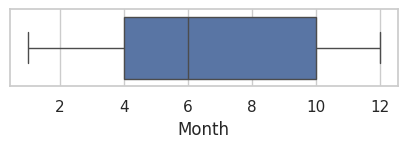

In [ ]:
for column in data.columns:
    if data[column].dtype in ['float64']:
        plt.figure(figsize=(5, 1))
        sns.boxplot(x=data[column])
        plt.show()

#visually we cannot see any outliers in boxplots but still lets do calculations
for column in df.columns:
    if df[column].dtype in ['float64']:
        # Calculate quartiles and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        print("\n..........................................")

        if len(outliers) > 0:
            print(f"Outliers in '{column}':")
            print(f"Number of outliers in '{column}': {len(outliers)}")

#therfore no outliers

check the inconsistencies in the data format and encoding

In [ ]:

data['Age'] = data['Age'].astype('int')
data['Purchase_Date'] = data['Purchase_Date'].astype('datetime64[ns]')
data['Purchase_Amount'] = data['Purchase_Amount'].astype('int')
data['Average_Spending_Per_Purchase'] = data['Average_Spending_Per_Purchase'].astype('int')
data['Purchase_Frequency_Per_Month'] = data['Purchase_Frequency_Per_Month'].astype('int')
data['Brand_Affinity_Score'] = data['Brand_Affinity_Score'].astype('int')
data['Month'] = data['Month'].astype('int')
data['Year'] = data['Year'].astype('int')
df['Gender'] = df['Gender'].str.lower()
data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    956 non-null    object        
 1   Age                            956 non-null    int64         
 2   Gender                         956 non-null    object        
 3   Income_Level                   956 non-null    object        
 4   Address                        956 non-null    object        
 5   Transaction_ID                 956 non-null    object        
 6   Purchase_Date                  956 non-null    datetime64[ns]
 7   Product_ID                     956 non-null    object        
 8   Product_Category               956 non-null    object        
 9   Brand                          956 non-null    object        
 10  Purchase_Amount                956 non-null    int64         
 11  Average_Spending_Per_Pur

Feature Engineering

In [ ]:
#1 Customer_Loyalty_Score

data['Customer_Loyalty_Score'] = (
    data['Purchase_Frequency_Per_Month'] * data['Brand_Affinity_Score']
)

#2 Lifetime_Spend
data['Lifetime_Spend'] = (
    data['Average_Spending_Per_Purchase'] *
    data['Purchase_Frequency_Per_Month'] *
    (data['Age'] * 12)
)

#3 Age_Group
def categorize_age(age):
    if 18 <= age <= 25:
        return 'Youth'
    elif 26 <= age <= 45:
        return 'Adult'
    elif 46 <= age <= 65:
        return 'Middle-aged'
    else:
        return 'Senior'

data['Age_Group'] = data['Age'].apply(categorize_age)

#4 Income Bracket
income_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

data['Income_Bracket'] = data['Income_Level'].map(income_mapping)

print(data.columns)
print(data.head())
print(data.info())

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season',
       'Will_Purchase_Next_Month', 'Customer_Loyalty_Score', 'Lifetime_Spend',
       'Age_Group', 'Income_Bracket'],
      dtype='object')
                            Customer_ID  Age  Gender Income_Level  \
0  b81ee6c9-2ae4-48a7-b283-220eaa244f43   40  Female       Medium   
2  fdf79bcd-5908-4c90-8501-570ffb5b7648   57   Other          Low   
3  878dccba-893a-48f9-8d34-6ed394fa3c9c   38  Female       Medium   
4  0af0bd81-73cc-494e-aa5e-75c6d0b6d743   68   Other       Medium   
5  5a4ac4ce-1e09-4ecb-805c-fb676f101385   26   Other         High   

                                             Address  \
0  43548 Murray Islands Suite 974\nAmyberg, CT 134

Standardize or normalize numeric features to ensure they contribute equally to
the given algorithms.

In [ ]:

numeric_cols = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
                'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Lifetime_Spend','Month','Year','Will_Purchase_Next_Month']

for column in numeric_cols:
    data[column+"_n"] = (data[column] - data[column].mean()) / data[column].std()

print(data.info())

print(data.head(10))



<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Customer_ID                      956 non-null    object        
 1   Age                              956 non-null    int64         
 2   Gender                           956 non-null    object        
 3   Income_Level                     956 non-null    object        
 4   Address                          956 non-null    object        
 5   Transaction_ID                   956 non-null    object        
 6   Purchase_Date                    956 non-null    datetime64[ns]
 7   Product_ID                       956 non-null    object        
 8   Product_Category                 956 non-null    object        
 9   Brand                            956 non-null    object        
 10  Purchase_Amount                  956 non-null    int64         
 11

**Module 2: Exploratory Data Analysis (EDA)**

1. Univariate Analysis:

*o Analyze the distribution of key features like customer age, purchase amount,
and purchase frequency using histograms, boxplots, and descriptive statistics. <br>
o Identify potential skewness or outliers in the data.*

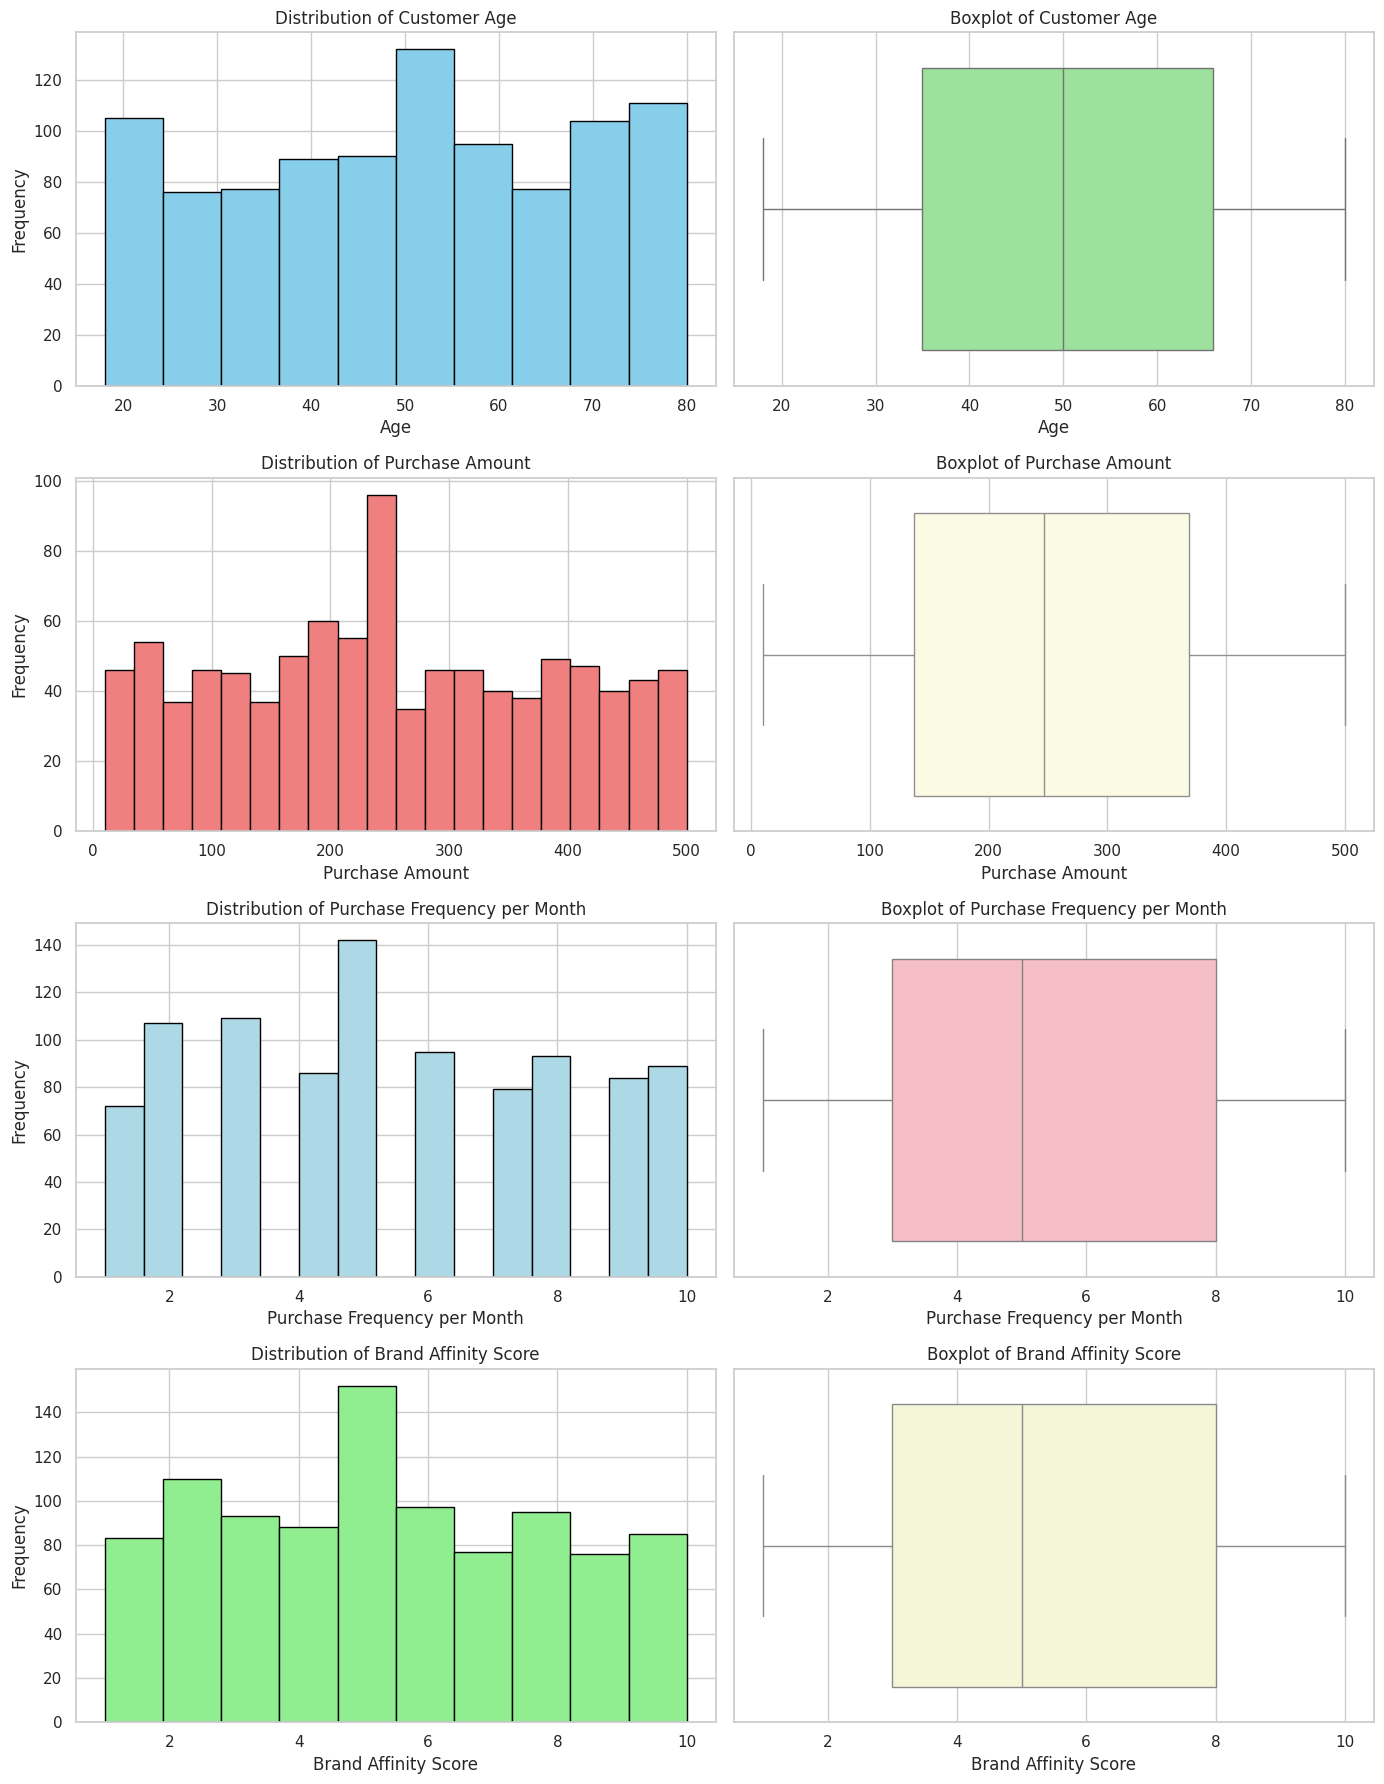

Descriptive statistics for Age:
count    956.000000
mean      49.801255
std       18.101871
min       18.000000
25%       35.000000
50%       50.000000
75%       66.000000
max       80.000000
Name: Age, dtype: float64 

Descriptive statistics for Purchase Amount:
count    956.000000
mean     250.729079
std      137.502422
min       10.000000
25%      137.000000
50%      247.000000
75%      369.000000
max      500.000000
Name: Purchase_Amount, dtype: float64 

Descriptive statistics for Purchase Frequency per Month:
count    956.000000
mean       5.418410
std        2.762243
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Purchase_Frequency_Per_Month, dtype: float64 

Descriptive statistics for Brand Affinity Score:
count    956.000000
mean       5.344142
std        2.758286
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Brand_Affinity_Score, dtype: float64 



In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(4, 2, figsize=(14, 18))

# 1. Age Distribution and Boxplot
axes[0, 0].hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Customer Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(x=data['Age'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Boxplot of Customer Age')
axes[0, 1].set_xlabel('Age')

# 2. Purchase Amount Distribution and Boxplot
axes[1, 0].hist(data['Purchase_Amount'], bins=20, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribution of Purchase Amount')
axes[1, 0].set_xlabel('Purchase Amount')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(x=data['Purchase_Amount'], ax=axes[1, 1], color='lightyellow')
axes[1, 1].set_title('Boxplot of Purchase Amount')
axes[1, 1].set_xlabel('Purchase Amount')

# 3. Purchase Frequency per Month Distribution and Boxplot
axes[2, 0].hist(data['Purchase_Frequency_Per_Month'], bins=15, color='lightblue', edgecolor='black')
axes[2, 0].set_title('Distribution of Purchase Frequency per Month')
axes[2, 0].set_xlabel('Purchase Frequency per Month')
axes[2, 0].set_ylabel('Frequency')

sns.boxplot(x=data['Purchase_Frequency_Per_Month'], ax=axes[2, 1], color='lightpink')
axes[2, 1].set_title('Boxplot of Purchase Frequency per Month')
axes[2, 1].set_xlabel('Purchase Frequency per Month')

# 4. Brand Affinity Score Distribution and Boxplot
axes[3, 0].hist(data['Brand_Affinity_Score'], bins=10, color='lightgreen', edgecolor='black')
axes[3, 0].set_title('Distribution of Brand Affinity Score')
axes[3, 0].set_xlabel('Brand Affinity Score')
axes[3, 0].set_ylabel('Frequency')

sns.boxplot(x=data['Brand_Affinity_Score'], ax=axes[3, 1], color='lightgoldenrodyellow')
axes[3, 1].set_title('Boxplot of Brand Affinity Score')
axes[3, 1].set_xlabel('Brand Affinity Score')

plt.tight_layout()
plt.show()

# Descriptive statistics for key features
print("Descriptive statistics for Age:")
print(data['Age'].describe(), "\n")

print("Descriptive statistics for Purchase Amount:")
print(data['Purchase_Amount'].describe(), "\n")

print("Descriptive statistics for Purchase Frequency per Month:")
print(data['Purchase_Frequency_Per_Month'].describe(), "\n")

print("Descriptive statistics for Brand Affinity Score:")
print(data['Brand_Affinity_Score'].describe(), "\n")


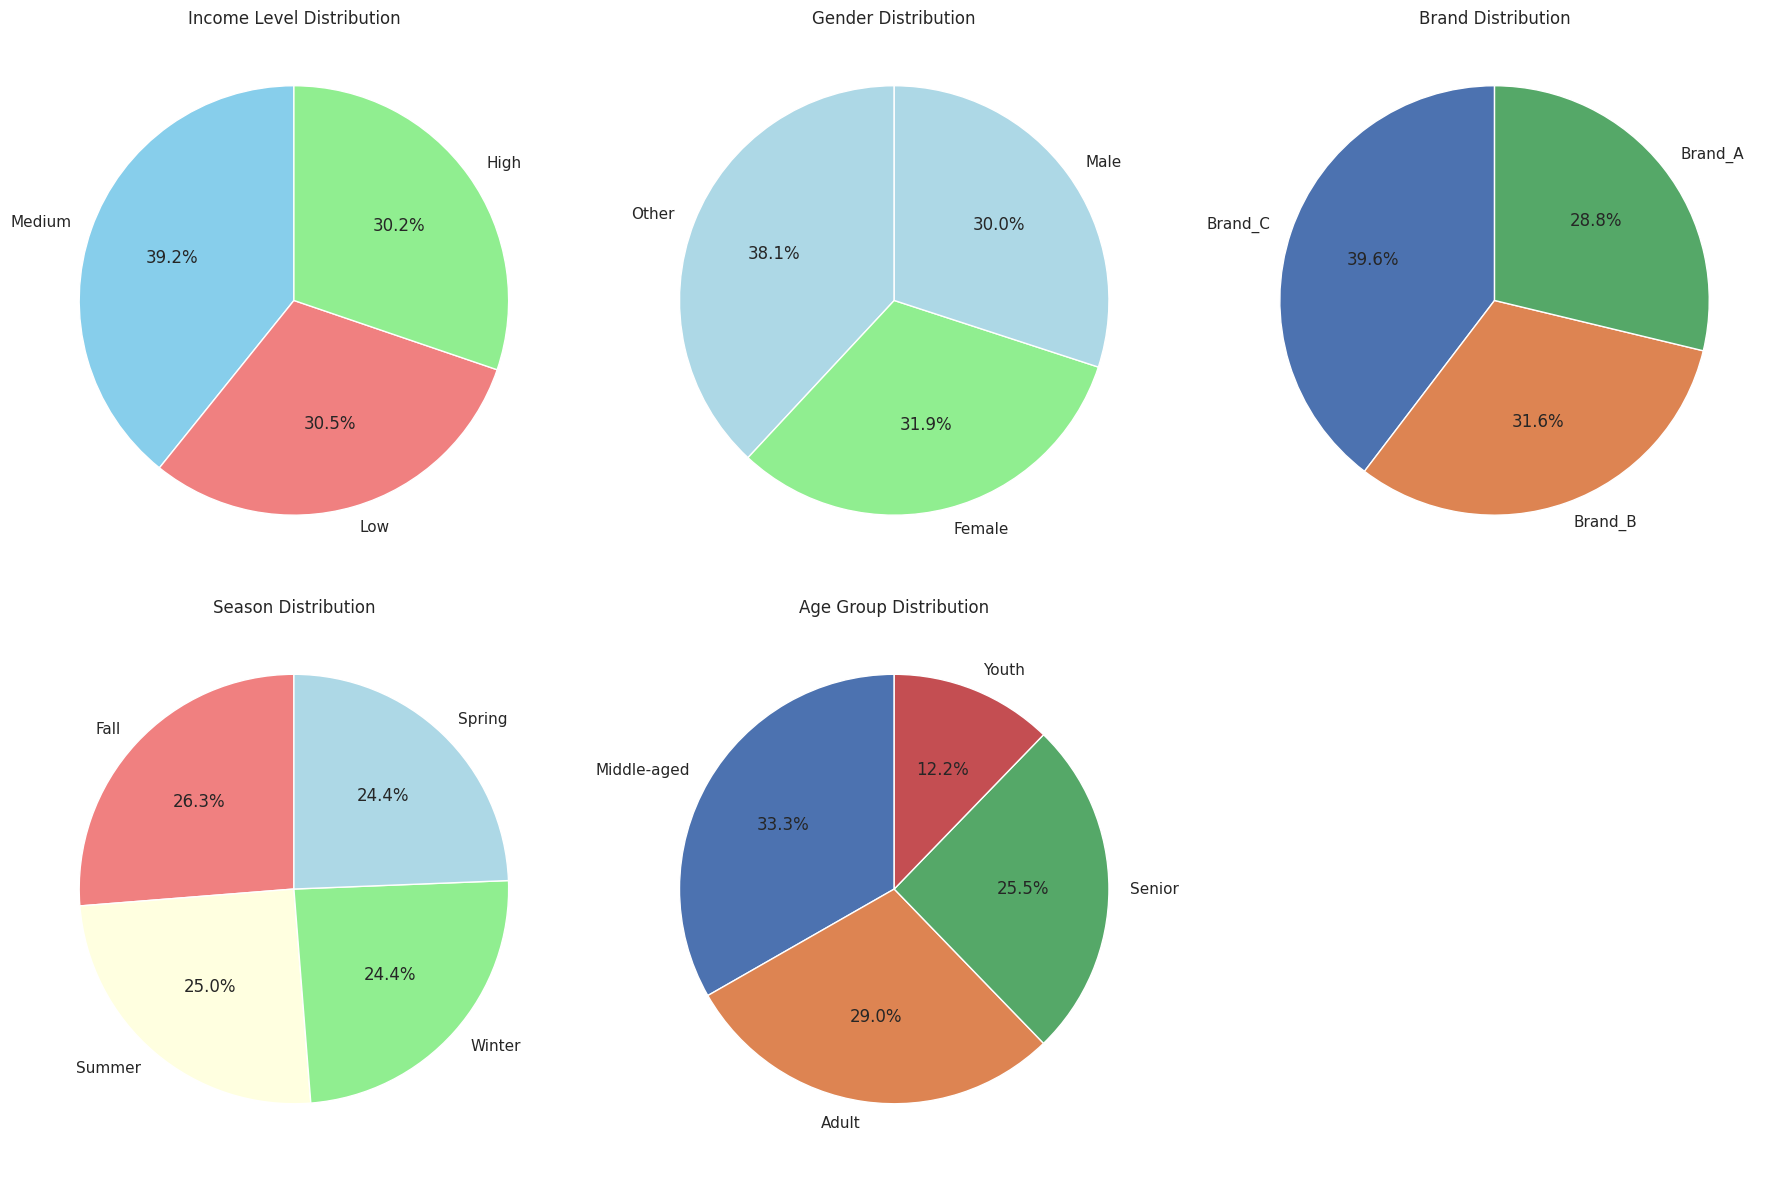

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Income Level Pie Chart
axes[0, 0].pie(data['Income_Level'].value_counts(), labels=data['Income_Level'].value_counts().index,
               autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'], startangle=90)
axes[0, 0].set_title('Income Level Distribution')

# 2. Gender Pie Chart
axes[0, 1].pie(data['Gender'].value_counts(), labels=data['Gender'].value_counts().index,
               autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
axes[0, 1].set_title('Gender Distribution')

# 3. Brand Pie Chart
axes[0, 2].pie(data['Brand'].value_counts(), labels=data['Brand'].value_counts().index,
               autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Brand Distribution')

# 4. Season Pie Chart
axes[1, 0].pie(data['Season'].value_counts(), labels=data['Season'].value_counts().index,
               autopct='%1.1f%%', colors=['lightcoral', 'lightyellow', 'lightgreen', 'lightblue'], startangle=90)
axes[1, 0].set_title('Season Distribution')

# 5. Age Group Pie Chart
axes[1, 1].pie(data['Age_Group'].value_counts(), labels=data['Age_Group'].value_counts().index,
               autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Age Group Distribution')

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()


Identify potential skewness or outliers in the data.

In [ ]:
#using the above whiskerplots we saw no outliers, also using calculation in module 1 as well we can confirm no outliers
skew_age = data['Age'].skew()
skew_purchase_amount = data['Purchase_Amount'].skew()
skew_purchase_frequency = data['Purchase_Frequency_Per_Month'].skew()
skew_brand_affinity = data['Brand_Affinity_Score'].skew()
skew_average_spending = data['Average_Spending_Per_Purchase'].skew()

print("Skewness for Customer Age:", skew_age)
print("Skewness for Purchase Amount:", skew_purchase_amount)
print("Skewness for Purchase Frequency:", skew_purchase_frequency)
print("Skewness for Brand Affinity Score:", skew_brand_affinity)
print("Skewness for Average Spending Per Purchase:", skew_average_spending)

print("\nSkewness around 0 indicates normal distribution.\n Positive values suggest right skew (fewer large values), negative values suggest left skew (more smaller values).")

Skewness for Customer Age: -0.05687147725238856
Skewness for Purchase Amount: 0.047461594789086514
Skewness for Purchase Frequency: 0.10293911714891323
Skewness for Brand Affinity Score: 0.10563701411141097
Skewness for Average Spending Per Purchase: 0.11937646142419861

Skewness around 0 indicates normal distribution.
 Positive values suggest right skew (fewer large values), negative values suggest left skew (more smaller values).


2. Bivariate Analysis:


*o Utilize scatterplots and heatmaps to explore relationships between different
features, such as purchase amount vs. income level, brand affinity vs. product
category, and purchase frequency vs. age. <br>
o Investigate the presence of correlations and identify any impactful
relationships.*

In [ ]:

columns_to_encode = ['Age_Group', 'Income_Bracket', 'Season', 'Product_Category_Preferences',
                     'Brand', 'Product_Category', 'Income_Level', 'Gender']

encoded_data = pd.get_dummies(data[columns_to_encode], drop_first=False)

remaining_columns = data.drop(columns=columns_to_encode)
data_new = pd.concat([remaining_columns, encoded_data], axis=1)

print(data_new.head())
print(data_new.columns)


                            Customer_ID  Age  \
0  b81ee6c9-2ae4-48a7-b283-220eaa244f43   40   
2  fdf79bcd-5908-4c90-8501-570ffb5b7648   57   
3  878dccba-893a-48f9-8d34-6ed394fa3c9c   38   
4  0af0bd81-73cc-494e-aa5e-75c6d0b6d743   68   
5  5a4ac4ce-1e09-4ecb-805c-fb676f101385   26   

                                             Address  \
0  43548 Murray Islands Suite 974\nAmyberg, CT 13457   
2     79683 Kevin Hill Apt. 555\nJohnshire, AR 39961   
3  02998 Hall Meadows Suite 809\nNorth Robertvill...   
4  21411 Timothy Ford Apt. 320\nDavisborough, AR ...   
5  843 John Knoll Suite 876\nRodriguezmouth, MO 3...   

                         Transaction_ID Purchase_Date  \
0  c6a6c712-e36b-406a-bfde-f53bdcf4744f    2022-04-26   
2  462925b1-a5bf-4996-bda2-59749de64eea    2021-12-09   
3  3cfafa02-6b34-4d77-9e05-d223dfab64e8    2022-12-03   
4  0d8dc27a-0c8f-4a82-b57e-8bf54cee9759    2020-06-08   
5  5b0d927b-a342-4df1-8846-a1acc62e2842    2022-12-03   

                             Pr

Scatterplots

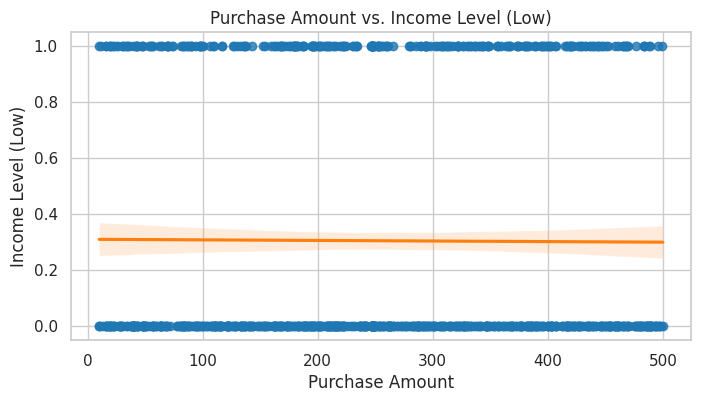

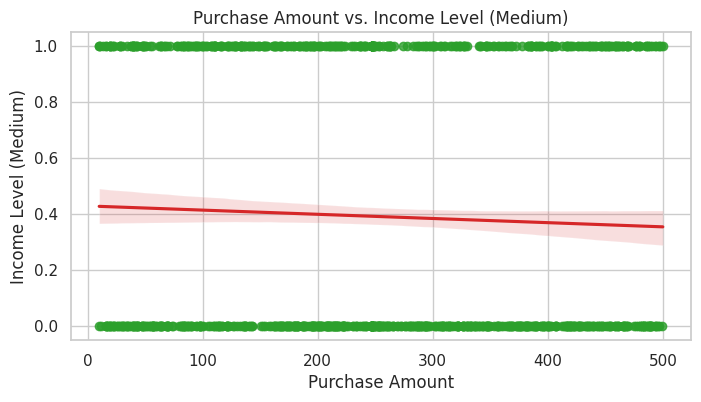

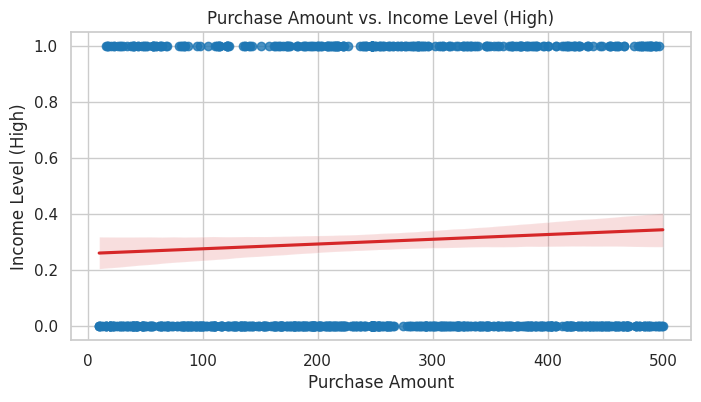

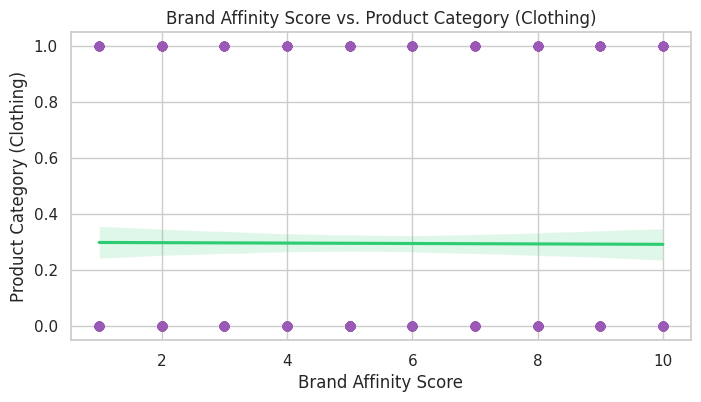

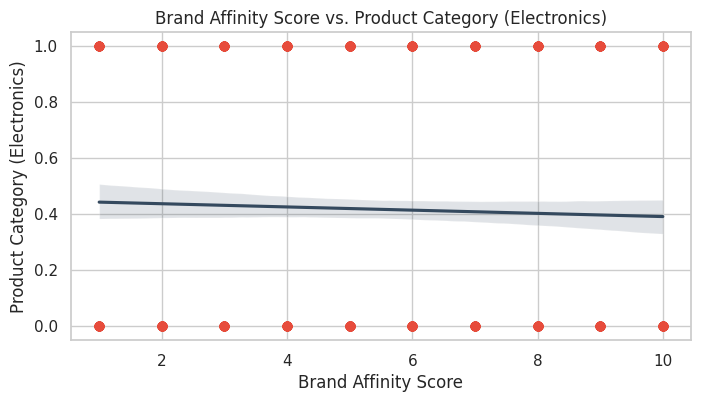

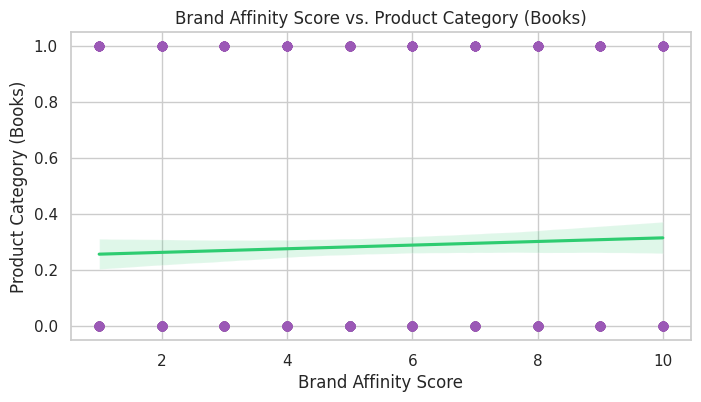

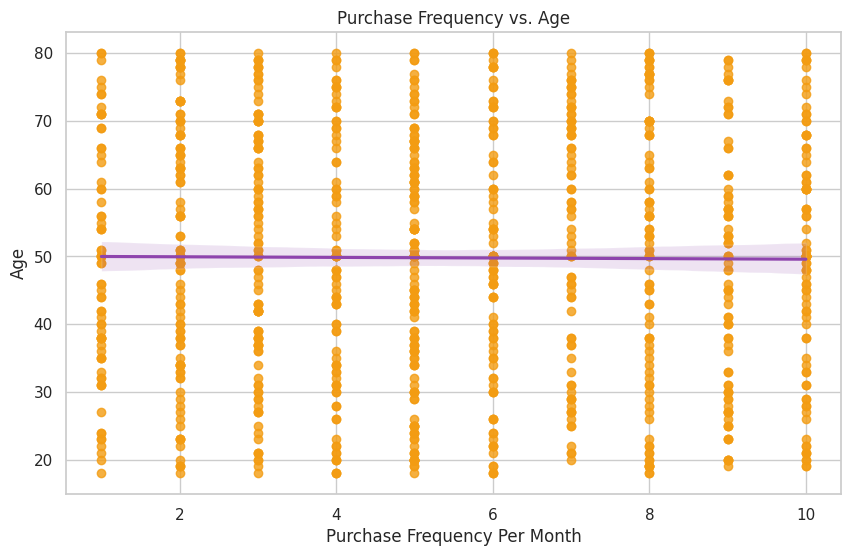

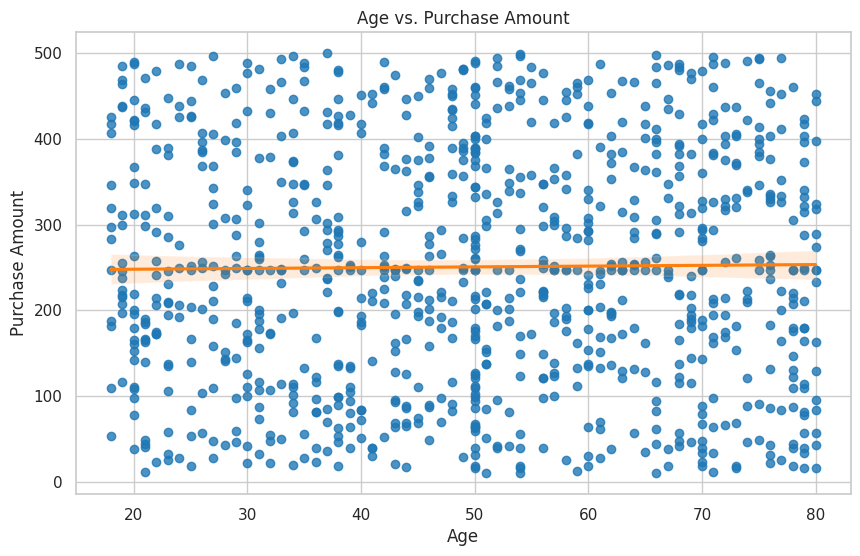

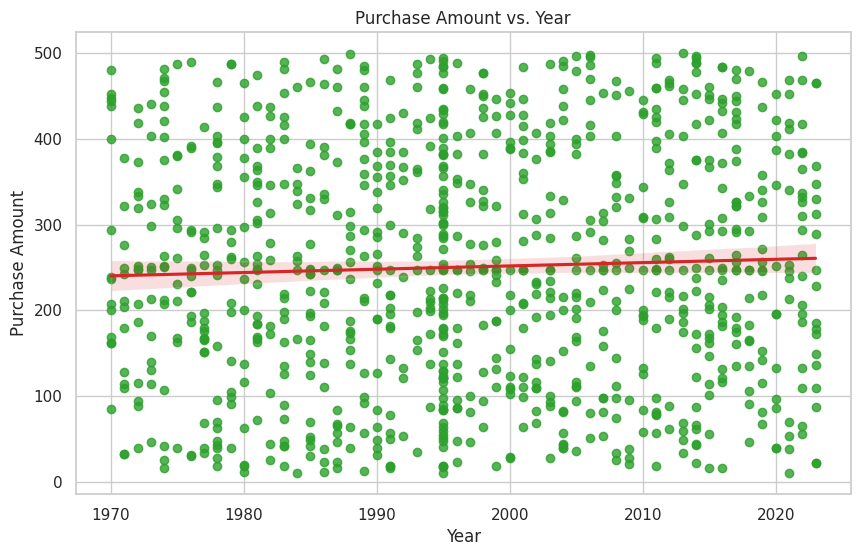

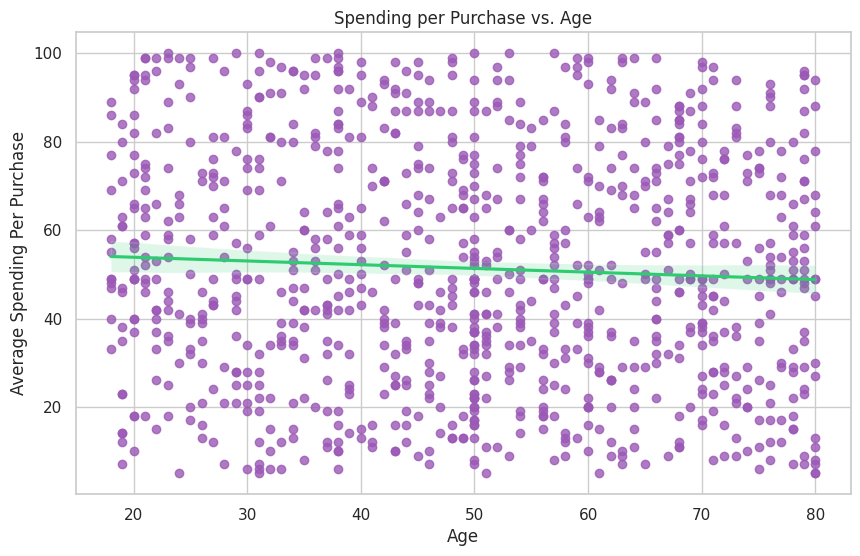

In [ ]:
# Scatterplot with regression line:
plt.figure(figsize=(8, 4))
sns.regplot(x='Purchase_Amount', y='Income_Level_Low', data=data_new, scatter_kws={'color': '#1f77b4'}, line_kws={'color': '#ff7f0e'})
plt.title('Purchase Amount vs. Income Level (Low)')
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level (Low)')
plt.show()

plt.figure(figsize=(8, 4))
sns.regplot(x='Purchase_Amount', y='Income_Level_Medium', data=data_new, scatter_kws={'color': '#2ca02c'}, line_kws={'color': '#d62728'})
plt.title('Purchase Amount vs. Income Level (Medium)')
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level (Medium)')
plt.show()

plt.figure(figsize=(8, 4))
sns.regplot(x='Purchase_Amount', y='Income_Level_High', data=data_new, scatter_kws={'color': '#1f77b4'}, line_kws={'color': '#d62728'})
plt.title('Purchase Amount vs. Income Level (High)')
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level (High)')
plt.show()

# Brand Affinity Score vs. Product Category
plt.figure(figsize=(8, 4))
sns.regplot(x='Brand_Affinity_Score', y='Product_Category_Clothing', data=data_new, scatter_kws={'color': '#9b59b6'}, line_kws={'color': '#2ecc71'})
plt.title('Brand Affinity Score vs. Product Category (Clothing)')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Product Category (Clothing)')
plt.show()

plt.figure(figsize=(8, 4))
sns.regplot(x='Brand_Affinity_Score', y='Product_Category_Electronics', data=data_new, scatter_kws={'color': '#e74c3c'}, line_kws={'color': '#34495e'})
plt.title('Brand Affinity Score vs. Product Category (Electronics)')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Product Category (Electronics)')
plt.show()

plt.figure(figsize=(8, 4))
sns.regplot(x='Brand_Affinity_Score', y='Product_Category_Books', data=data_new, scatter_kws={'color': '#9b59b6'}, line_kws={'color': '#2ecc71'})
plt.title('Brand Affinity Score vs. Product Category (Books)')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Product Category (Books)')
plt.show()

# Purchase Frequency vs. Age
plt.figure(figsize=(10, 6))
sns.regplot(x='Purchase_Frequency_Per_Month', y='Age', data=data_new, scatter_kws={'color': '#f39c12'}, line_kws={'color': '#8e44ad'})
plt.title('Purchase Frequency vs. Age')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Age')
plt.show()

# Age vs. Purchase Amount
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Purchase_Amount', data=data_new, scatter_kws={'color': '#1f77b4'}, line_kws={'color': '#ff7f0e'})
plt.title('Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

#  Purchase Amount vs. Year
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='Purchase_Amount', data=data_new, scatter_kws={'color': '#2ca02c'}, line_kws={'color': '#d62728'})
plt.title('Purchase Amount vs. Year')
plt.xlabel('Year')
plt.ylabel('Purchase Amount')
plt.show()

# Spending per Purchase vs. Age
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Average_Spending_Per_Purchase', data=data_new, scatter_kws={'color': '#9b59b6'}, line_kws={'color': '#2ecc71'})
plt.title('Spending per Purchase vs. Age')
plt.xlabel('Age')
plt.ylabel('Average Spending Per Purchase')
plt.show()

HeatMap

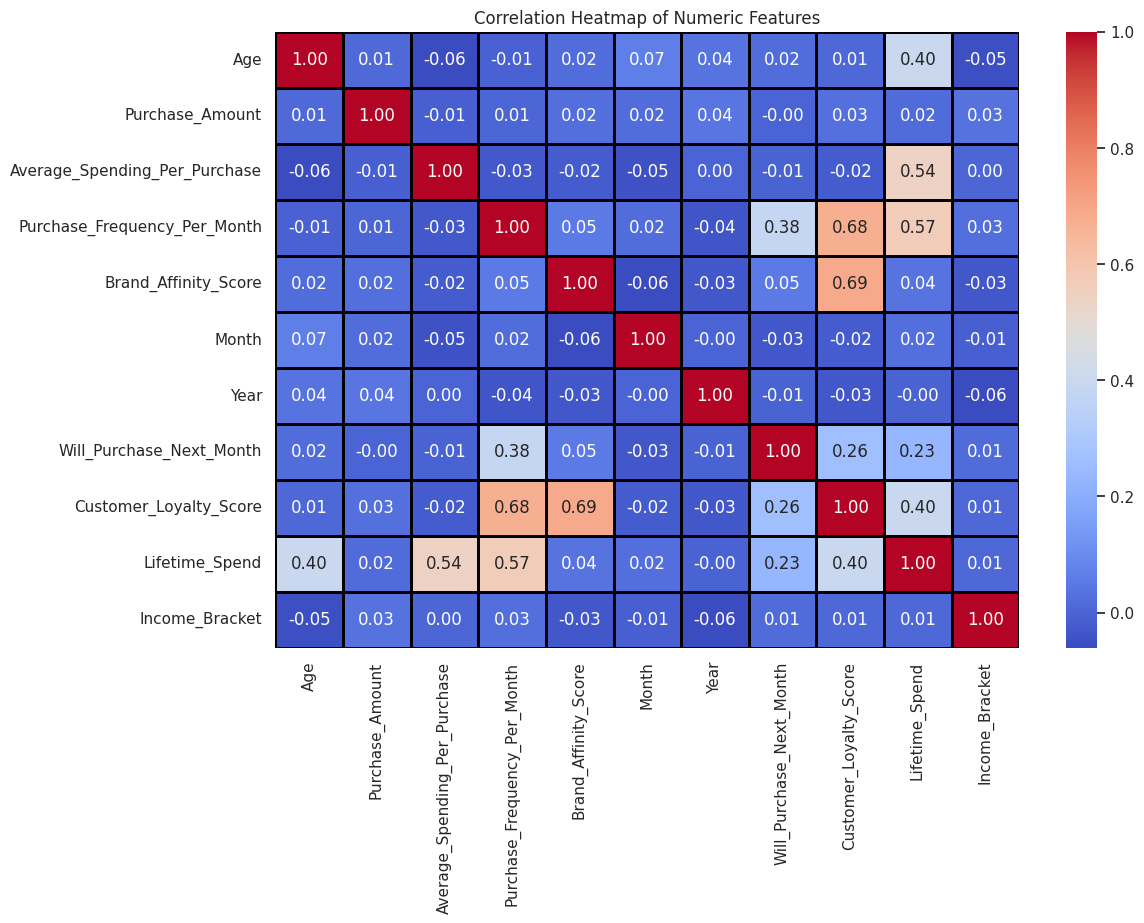

In [ ]:

numeric_columns = [
    col for col in data.select_dtypes(include=['int64', 'float64']).columns
    if not col.endswith('_n')
]
numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', cbar=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()



Temporal Analysis

*o Analyse trends in customer behaviour over time, including changes in
purchase frequency, average spending, and product preferences.*

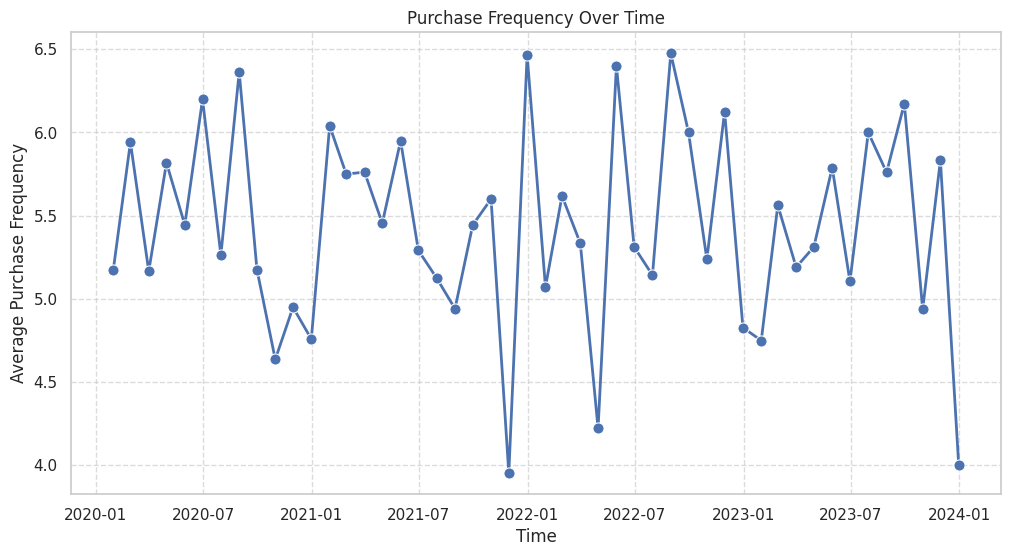

In [ ]:
purchase_frequency_over_time = data_new.resample('ME', on='Purchase_Date')['Purchase_Frequency_Per_Month'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=purchase_frequency_over_time.index, y=purchase_frequency_over_time.values, color='b', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Purchase Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Average Purchase Frequency')
plt.show()



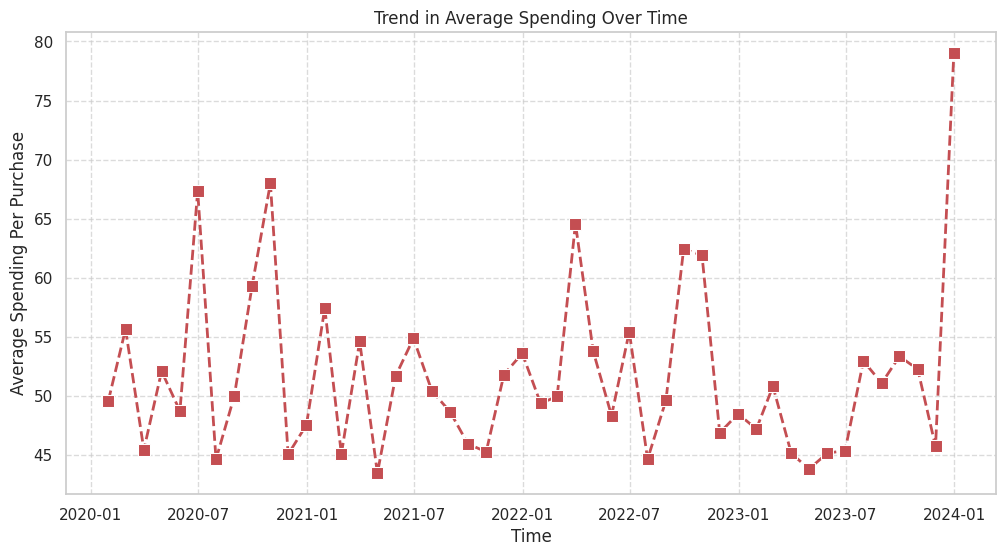

In [ ]:
average_spending_over_time = data_new.resample('ME', on='Purchase_Date')['Average_Spending_Per_Purchase'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_spending_over_time.index, y=average_spending_over_time.values, color='r', marker='s', linestyle='--', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Trend in Average Spending Over Time')
plt.xlabel('Time')
plt.ylabel('Average Spending Per Purchase')
plt.show()

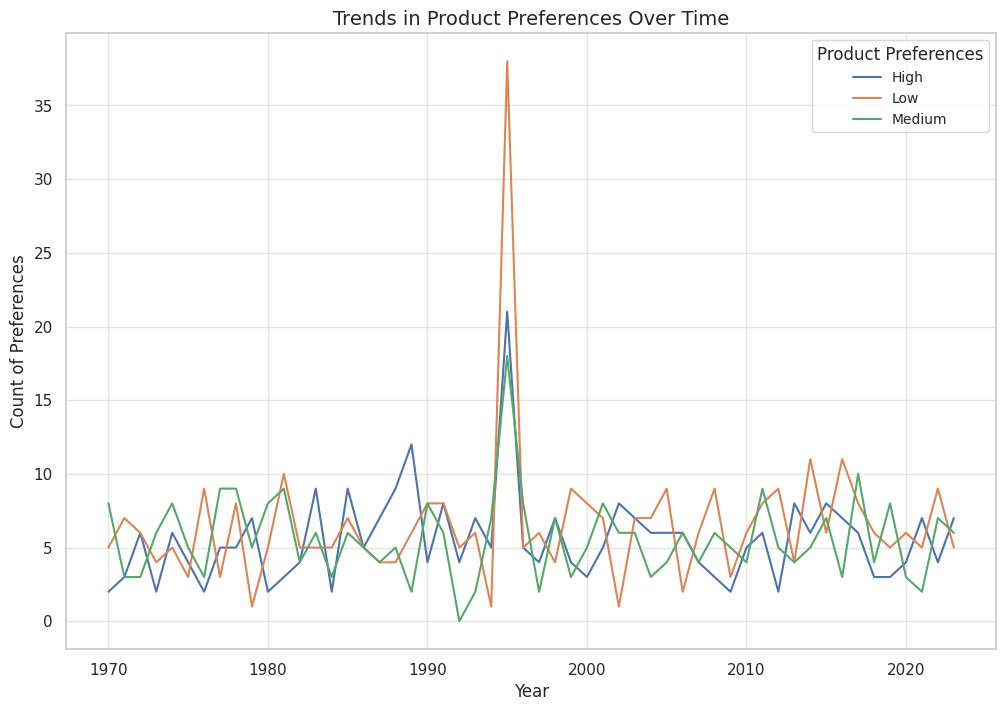

In [ ]:
preferences_over_time = (
    data.groupby(['Year', 'Product_Category_Preferences'])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 8))

for preference in preferences_over_time.columns:
    plt.plot(preferences_over_time.index, preferences_over_time[preference], label=preference)

plt.title('Trends in Product Preferences Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Preferences', fontsize=12)
plt.legend(title='Product Preferences', fontsize=10)
plt.grid(alpha=0.5)
plt.show()


*o Identify seasonal variations or any significant shifts in customer behavior
patterns.*

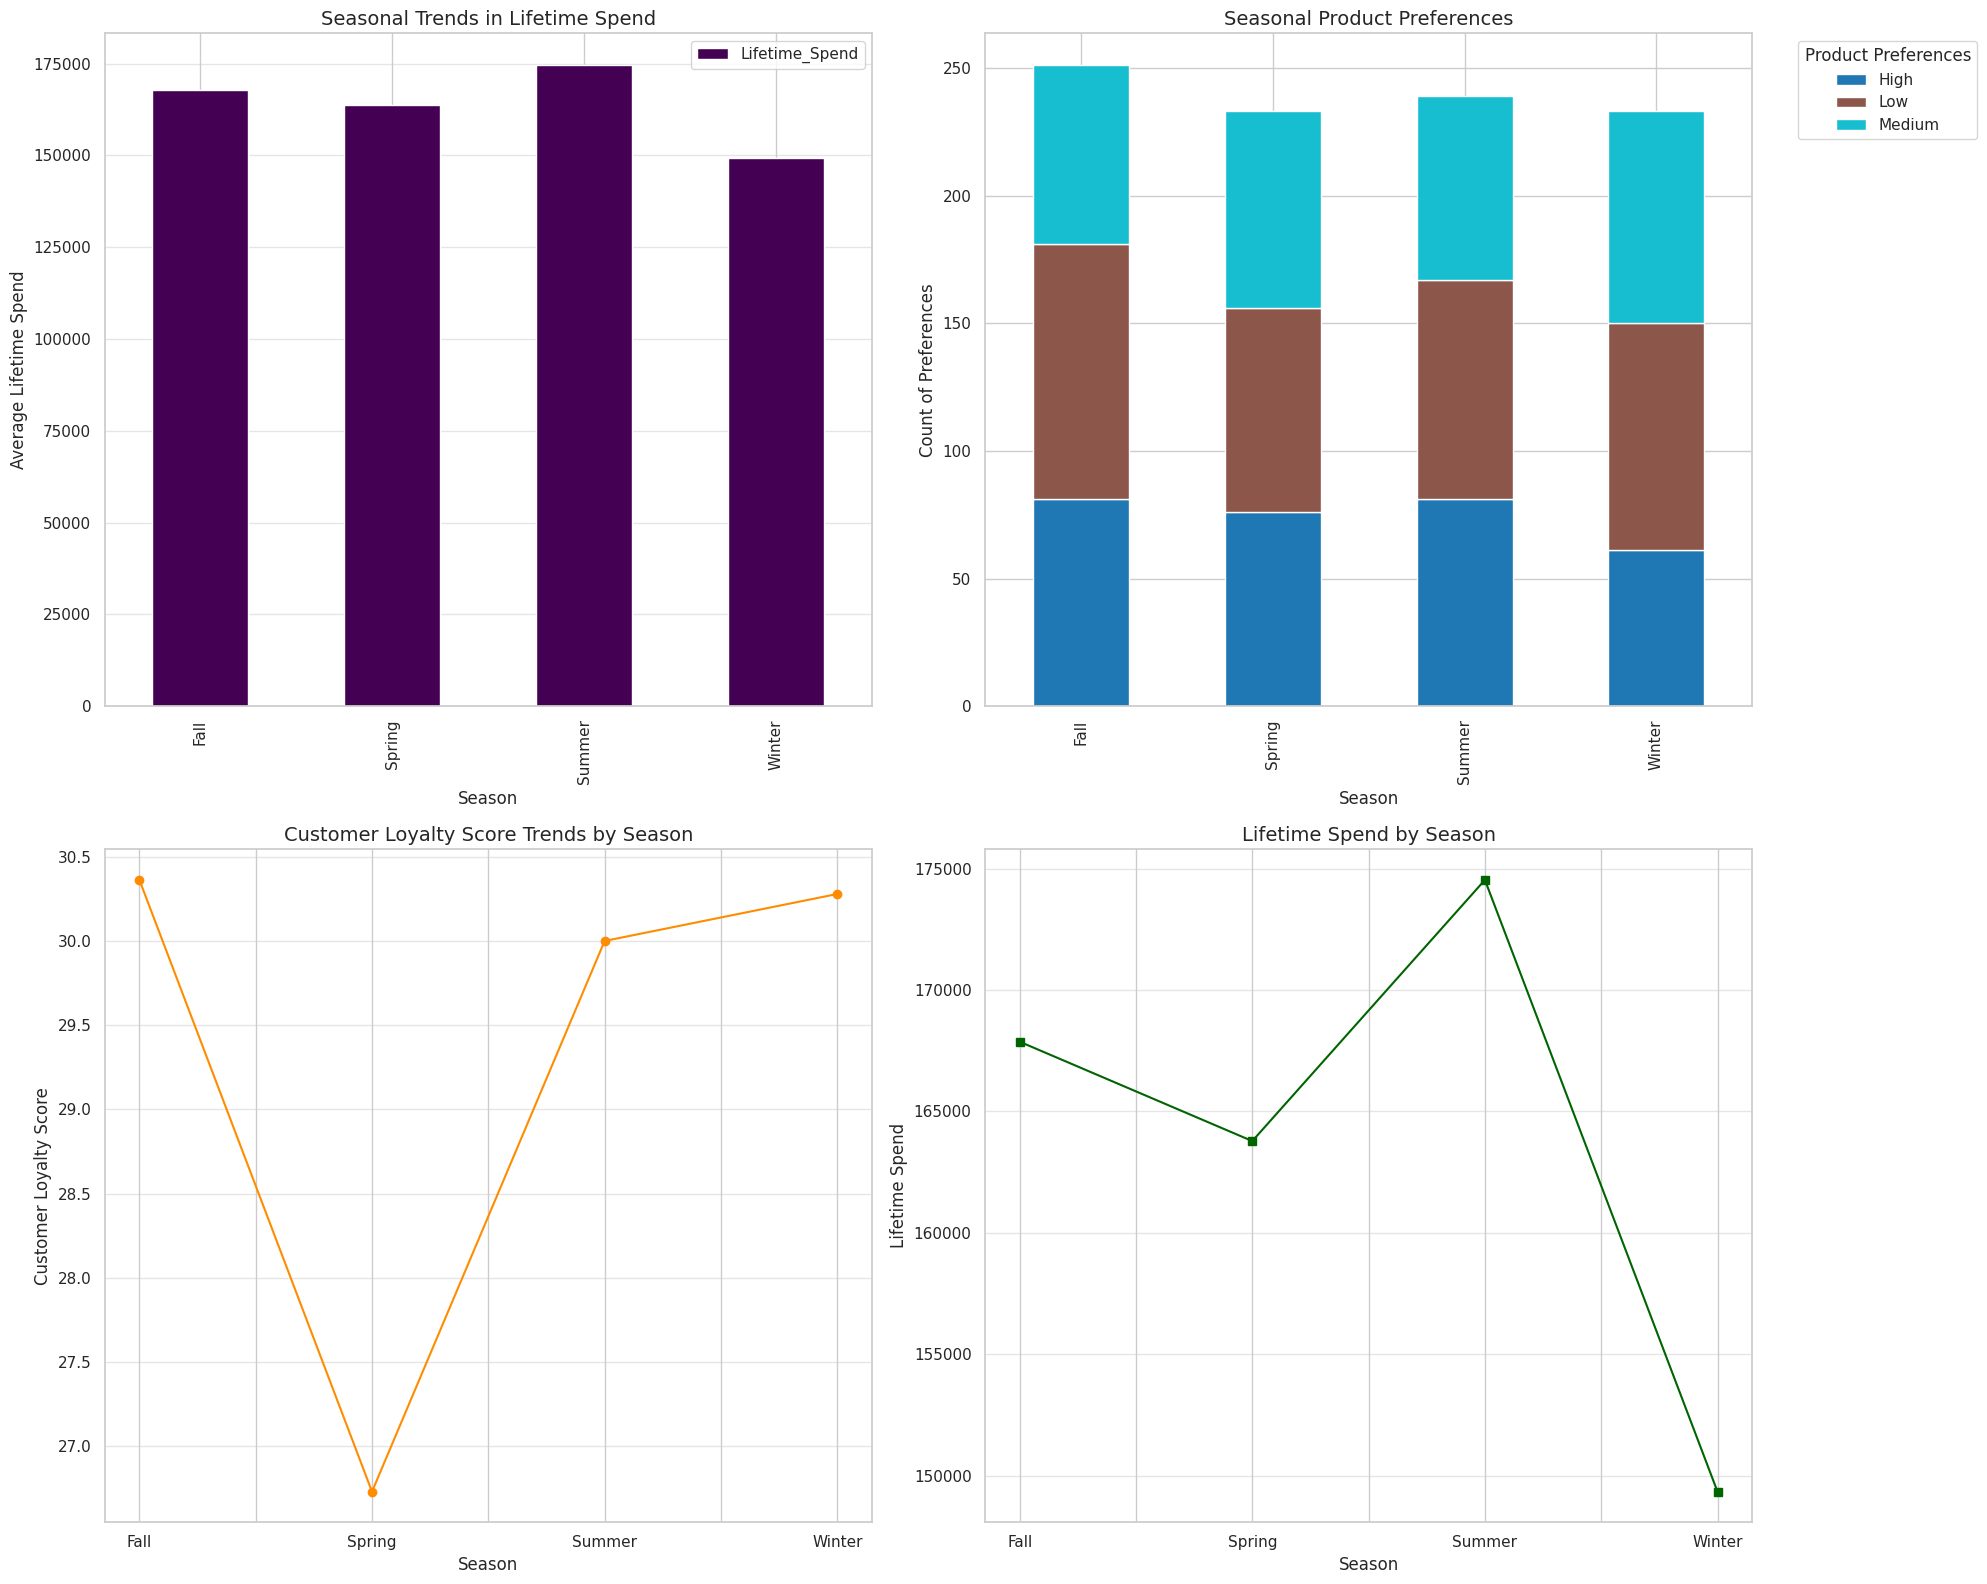

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data_new['Temp_Season'] = data_new[['Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']].idxmax(axis=1)
data_new['Temp_Season'] = data_new['Temp_Season'].str.replace('Season_', '')  # Remove 'Season_' prefix


seasonal_trends = data_new.groupby('Temp_Season')[['Lifetime_Spend']].mean()

data_new.drop(columns=['Temp_Season'], inplace=True)
product_preferences_by_season = data.groupby('Season')['Product_Category_Preferences'].value_counts().unstack(fill_value=0)

loyalty_and_spend = data.groupby('Season')[
    ['Customer_Loyalty_Score', 'Lifetime_Spend']
].mean()
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Seasonal trends in 'Lifetime_Spend'
seasonal_trends.plot(kind='bar', ax=axes[0, 0], colormap='viridis', legend=True)
axes[0, 0].set_title('Seasonal Trends in Lifetime Spend', fontsize=14)
axes[0, 0].set_xlabel('Season', fontsize=12)
axes[0, 0].set_ylabel('Average Lifetime Spend', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.5)

# Seasonal product preferences
product_preferences_by_season.plot(
    kind='bar', stacked=True, ax=axes[0, 1], colormap='tab10'
)
axes[0, 1].set_title('Seasonal Product Preferences', fontsize=14)
axes[0, 1].set_xlabel('Season', fontsize=12)
axes[0, 1].set_ylabel('Count of Preferences', fontsize=12)
axes[0, 1].legend(title='Product Preferences', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customer loyalty score trends by season
loyalty_and_spend[['Customer_Loyalty_Score']].plot(
    kind='line', marker='o', ax=axes[1, 0], color='darkorange', legend=False
)
axes[1, 0].set_title('Customer Loyalty Score Trends by Season', fontsize=14)
axes[1, 0].set_xlabel('Season', fontsize=12)
axes[1, 0].set_ylabel('Customer Loyalty Score', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.5)

# Seasonal lifetime spend
loyalty_and_spend[['Lifetime_Spend']].plot(
    kind='line', marker='s', ax=axes[1, 1], color='darkgreen', legend=False
)
axes[1, 1].set_title('Lifetime Spend by Season', fontsize=14)
axes[1, 1].set_ylabel('Lifetime Spend', fontsize=12)
axes[1, 1].grid(axis='y', alpha=0.5)


plt.tight_layout()
plt.show()


**Module 4: Clustering Analysis:**

The optimal number of clusters is: 7


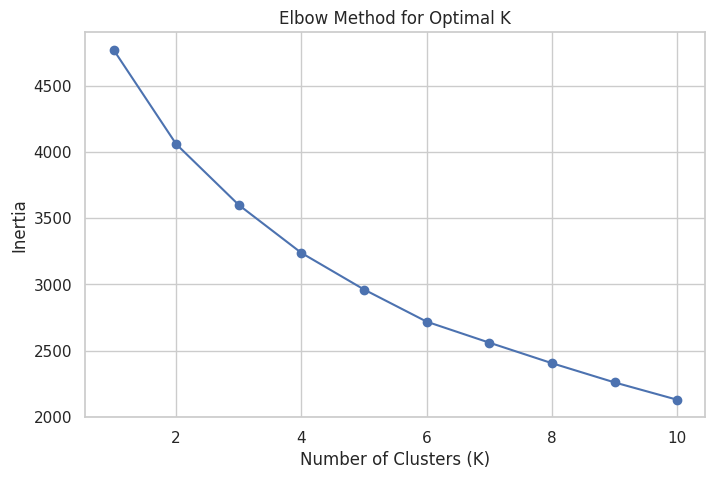

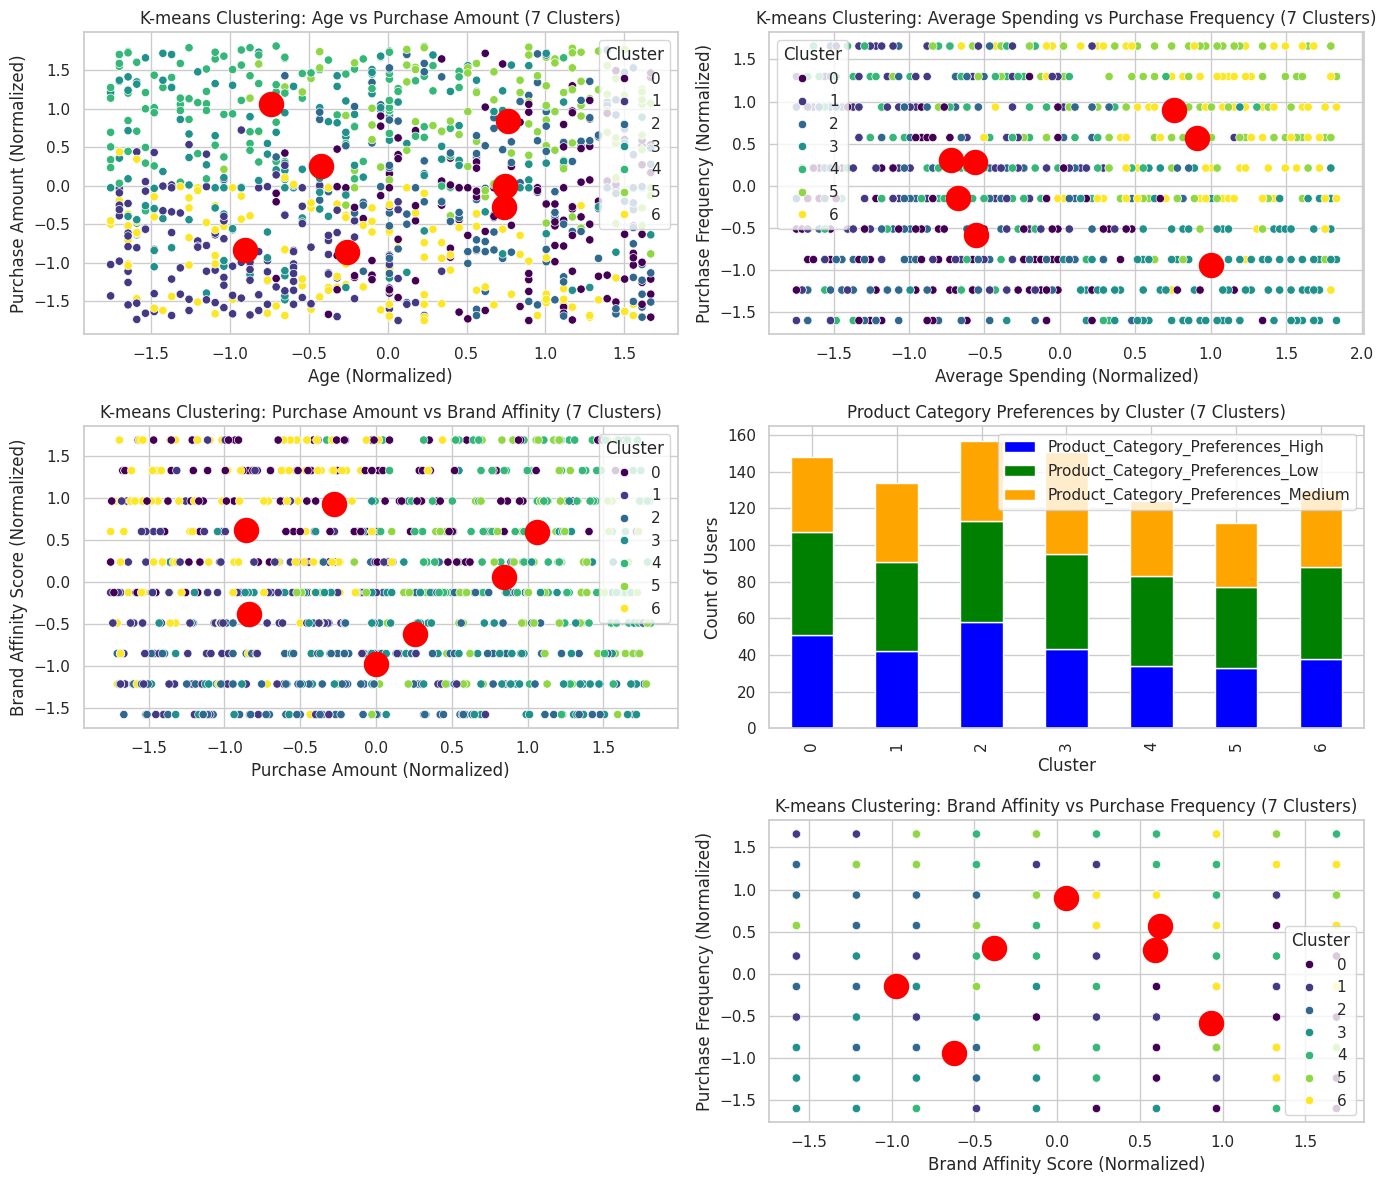

Cluster Summary:
             Age_n           Average_Spending_Per_Purchase_n            \
             mean       std                            mean       std   
Cluster                                                                 
0        0.736602  0.662183                       -0.558598  0.730578   
1       -0.903827  0.561268                       -0.723273  0.595424   
2        0.741452  0.634896                       -0.673704  0.665646   
3       -0.421452  0.885537                        1.002876  0.593940   
4       -0.742819  0.716799                       -0.560273  0.637103   
5        0.760704  0.677872                        0.758231  0.721248   
6       -0.259711  0.919357                        0.911387  0.616187   

        Purchase_Amount_n           Purchase_Frequency_Per_Month_n            \
                     mean       std                           mean       std   
Cluster                                                                        
0          

In [ ]:


# 1: Define the number of clusters (k) using the Elbow Method
# ------------------------------------------------------------

features = ['Age_n', 'Average_Spending_Per_Purchase_n', 'Purchase_Amount_n',
            'Purchase_Frequency_Per_Month_n', 'Brand_Affinity_Score_n']
dataN = data_new[features]

# inertia (sum of squared distances)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataN)
    inertia.append(kmeans.inertia_)

# the rate of change of inertia (first derivative)
inertia_diff = np.diff(inertia)

# the rate of change of the difference (second derivative)
inertia_diff_diff = np.diff(inertia_diff)


optimal_k = np.argmin(inertia_diff_diff) + 2
print(f"The optimal number of clusters is: {optimal_k}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# 2: Apply K-Means Clustering with the Optimal K
# ---------------------------------------------------
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_new['Cluster'] = kmeans.fit_predict(dataN)


fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.tight_layout(pad=5.0)

# **Age vs Purchase Amount**
sns.scatterplot(ax=axes[0, 0], x='Age_n', y='Purchase_Amount_n', hue='Cluster', data=data_new, palette='viridis', legend='full')
centroids = kmeans.cluster_centers_
axes[0, 0].scatter(centroids[:, 0], centroids[:, 2], s=300, c='red', marker='o', label='Centroids')
axes[0, 0].set_title(f'K-means Clustering: Age vs Purchase Amount ({optimal_k} Clusters)')
axes[0, 0].set_xlabel('Age (Normalized)')
axes[0, 0].set_ylabel('Purchase Amount (Normalized)')

# **Average Spending vs Purchase Frequency**
sns.scatterplot(ax=axes[0, 1], x='Average_Spending_Per_Purchase_n', y='Purchase_Frequency_Per_Month_n', hue='Cluster', data=data_new, palette='viridis', legend='full')
axes[0, 1].scatter(centroids[:, 1], centroids[:, 3], s=300, c='red', marker='o', label='Centroids')
axes[0, 1].set_title(f'K-means Clustering: Average Spending vs Purchase Frequency ({optimal_k} Clusters)')
axes[0, 1].set_xlabel('Average Spending (Normalized)')
axes[0, 1].set_ylabel('Purchase Frequency (Normalized)')

# **Purchase Amount vs Brand Affinity**
sns.scatterplot(ax=axes[1, 0], x='Purchase_Amount_n', y='Brand_Affinity_Score_n', hue='Cluster', data=data_new, palette='viridis', legend='full')
axes[1, 0].scatter(centroids[:, 2], centroids[:, 4], s=300, c='red', marker='o', label='Centroids')
axes[1, 0].set_title(f'K-means Clustering: Purchase Amount vs Brand Affinity ({optimal_k} Clusters)')
axes[1, 0].set_xlabel('Purchase Amount (Normalized)')
axes[1, 0].set_ylabel('Brand Affinity Score (Normalized)')

# **Product Category Preferences (Stacked Bar)**
category_columns = ['Product_Category_Preferences_High', 'Product_Category_Preferences_Low', 'Product_Category_Preferences_Medium']
category_counts_by_cluster = data_new.groupby('Cluster')[category_columns].sum()

category_counts_by_cluster.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['blue', 'green', 'orange'])
axes[1, 1].set_title(f'Product Category Preferences by Cluster ({optimal_k} Clusters)')
axes[1, 1].set_ylabel('Count of Users')
axes[1, 1].set_xlabel('Cluster')

# **Brand Affinity vs Purchase Frequency**
axes[2, 0].axis('off')
sns.scatterplot(ax=axes[2, 1], x='Brand_Affinity_Score_n', y='Purchase_Frequency_Per_Month_n', hue='Cluster', data=data_new, palette='viridis', legend='full')
axes[2,1].scatter(centroids[:, 4], centroids[:, 3], s=300, c='red', marker='o', label='Centroids')
axes[2, 1].set_title(f'K-means Clustering: Brand Affinity vs Purchase Frequency ({optimal_k} Clusters)')
axes[2, 1].set_xlabel('Brand Affinity Score (Normalized)')
axes[2, 1].set_ylabel('Purchase Frequency (Normalized)')

plt.tight_layout()
plt.show()

# 4: Cluster Summary (with mean and std)
# -----------------------------------------------------------
cluster_summary = data_new.groupby('Cluster')[['Age_n', 'Average_Spending_Per_Purchase_n', 'Purchase_Amount_n',
                                               'Purchase_Frequency_Per_Month_n', 'Brand_Affinity_Score_n']].agg(['mean', 'std'])
print("Cluster Summary:\n", cluster_summary)

# 5:Clustering Metrics (MSE, MAE, R-squared)
# -----------------------------------------------------------
mse = mean_squared_error(dataN, kmeans.cluster_centers_[kmeans.labels_])
mae = mean_absolute_error(dataN, kmeans.cluster_centers_[kmeans.labels_])
r_squared = r2_score(dataN, kmeans.cluster_centers_[kmeans.labels_])

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")


**Module 3: Regression and Decision Tree Analysis:**

**A. Linear Regression Analysis:**

In [ ]:
print(data_new.columns)

Index(['Customer_ID', 'Age', 'Address', 'Transaction_ID', 'Purchase_Date',
       'Product_ID', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year',
       'Will_Purchase_Next_Month', 'Customer_Loyalty_Score', 'Lifetime_Spend',
       'Age_n', 'Purchase_Amount_n', 'Average_Spending_Per_Purchase_n',
       'Purchase_Frequency_Per_Month_n', 'Brand_Affinity_Score_n',
       'Lifetime_Spend_n', 'Month_n', 'Year_n', 'Will_Purchase_Next_Month_n',
       'Income_Bracket', 'Age_Group_Adult', 'Age_Group_Middle-aged',
       'Age_Group_Senior', 'Age_Group_Youth', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Product_Category_Preferences_High',
       'Product_Category_Preferences_Low',
       'Product_Category_Preferences_Medium', 'Brand_Brand_A', 'Brand_Brand_B',
       'Brand_Brand_C', 'Product_Category_Books', 'Product_Category_Clothing',
       'Product_Category_Electronics', 'Income_Le

Model Evaluation Metrics:
Mean Absolute Error (MAE): 23.20
Mean Squared Error (MSE): 742.73
R-squared (R²): -0.01


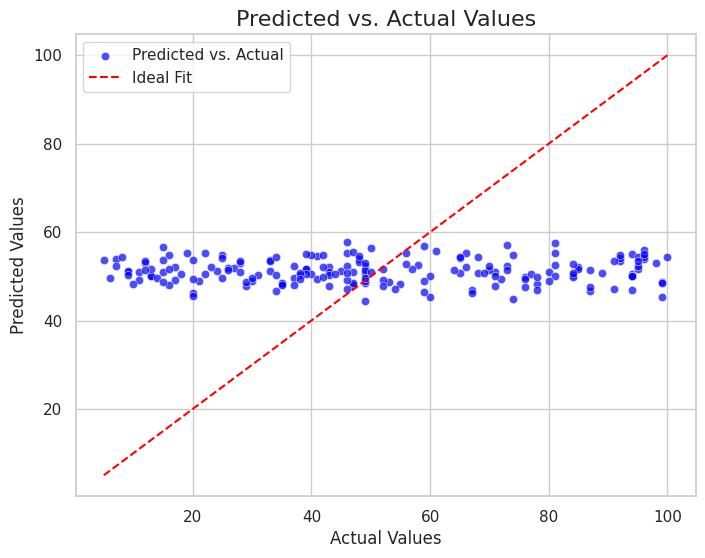

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


target = 'Average_Spending_Per_Purchase'
predictors = ['Age', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Income_Level_High',
              'Income_Level_Low', 'Income_Level_Medium', 'Purchase_Frequency_Per_Month',
              'Brand_Affinity_Score', 'Product_Category_Preferences_High',
              'Product_Category_Preferences_Low', 'Product_Category_Preferences_Medium']

# features and target variable
X = data_new[predictors]
y = data_new[target].astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue", label="Predicted vs. Actual")

# Plotting the ideal regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Ideal Fit")
plt.title("Predicted vs. Actual Values", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



**B. Decision Tree Analysis:**

Target and Predictors

In [ ]:
target = 'Will_Purchase_Next_Month'
predictors = ['Purchase_Frequency_Per_Month', 'Average_Spending_Per_Purchase',
              'Brand_Affinity_Score', 'Product_Category_Preferences']

Preprocessing Pipelines

In [ ]:
numeric_features = ['Purchase_Frequency_Per_Month', 'Average_Spending_Per_Purchase', 'Brand_Affinity_Score']
categorical_features = ['Product_Category_Preferences']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', random_state=42))  # Changing 'gini' to 'entropy' for entropy criterion
])


Splitting Data into Training and Testing Sets and Training the Model

In [ ]:
X = df[predictors]
y = df[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the model
decision_tree_pipeline.fit(X_train, y_train)


y_pred = decision_tree_pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.92
Precision: 0.95
Recall: 0.96
F1 Score: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        24
           1       0.95      0.96      0.95       176

    accuracy                           0.92       200
   macro avg       0.82      0.79      0.80       200
weighted avg       0.92      0.92      0.92       200



Decision tree Visualization

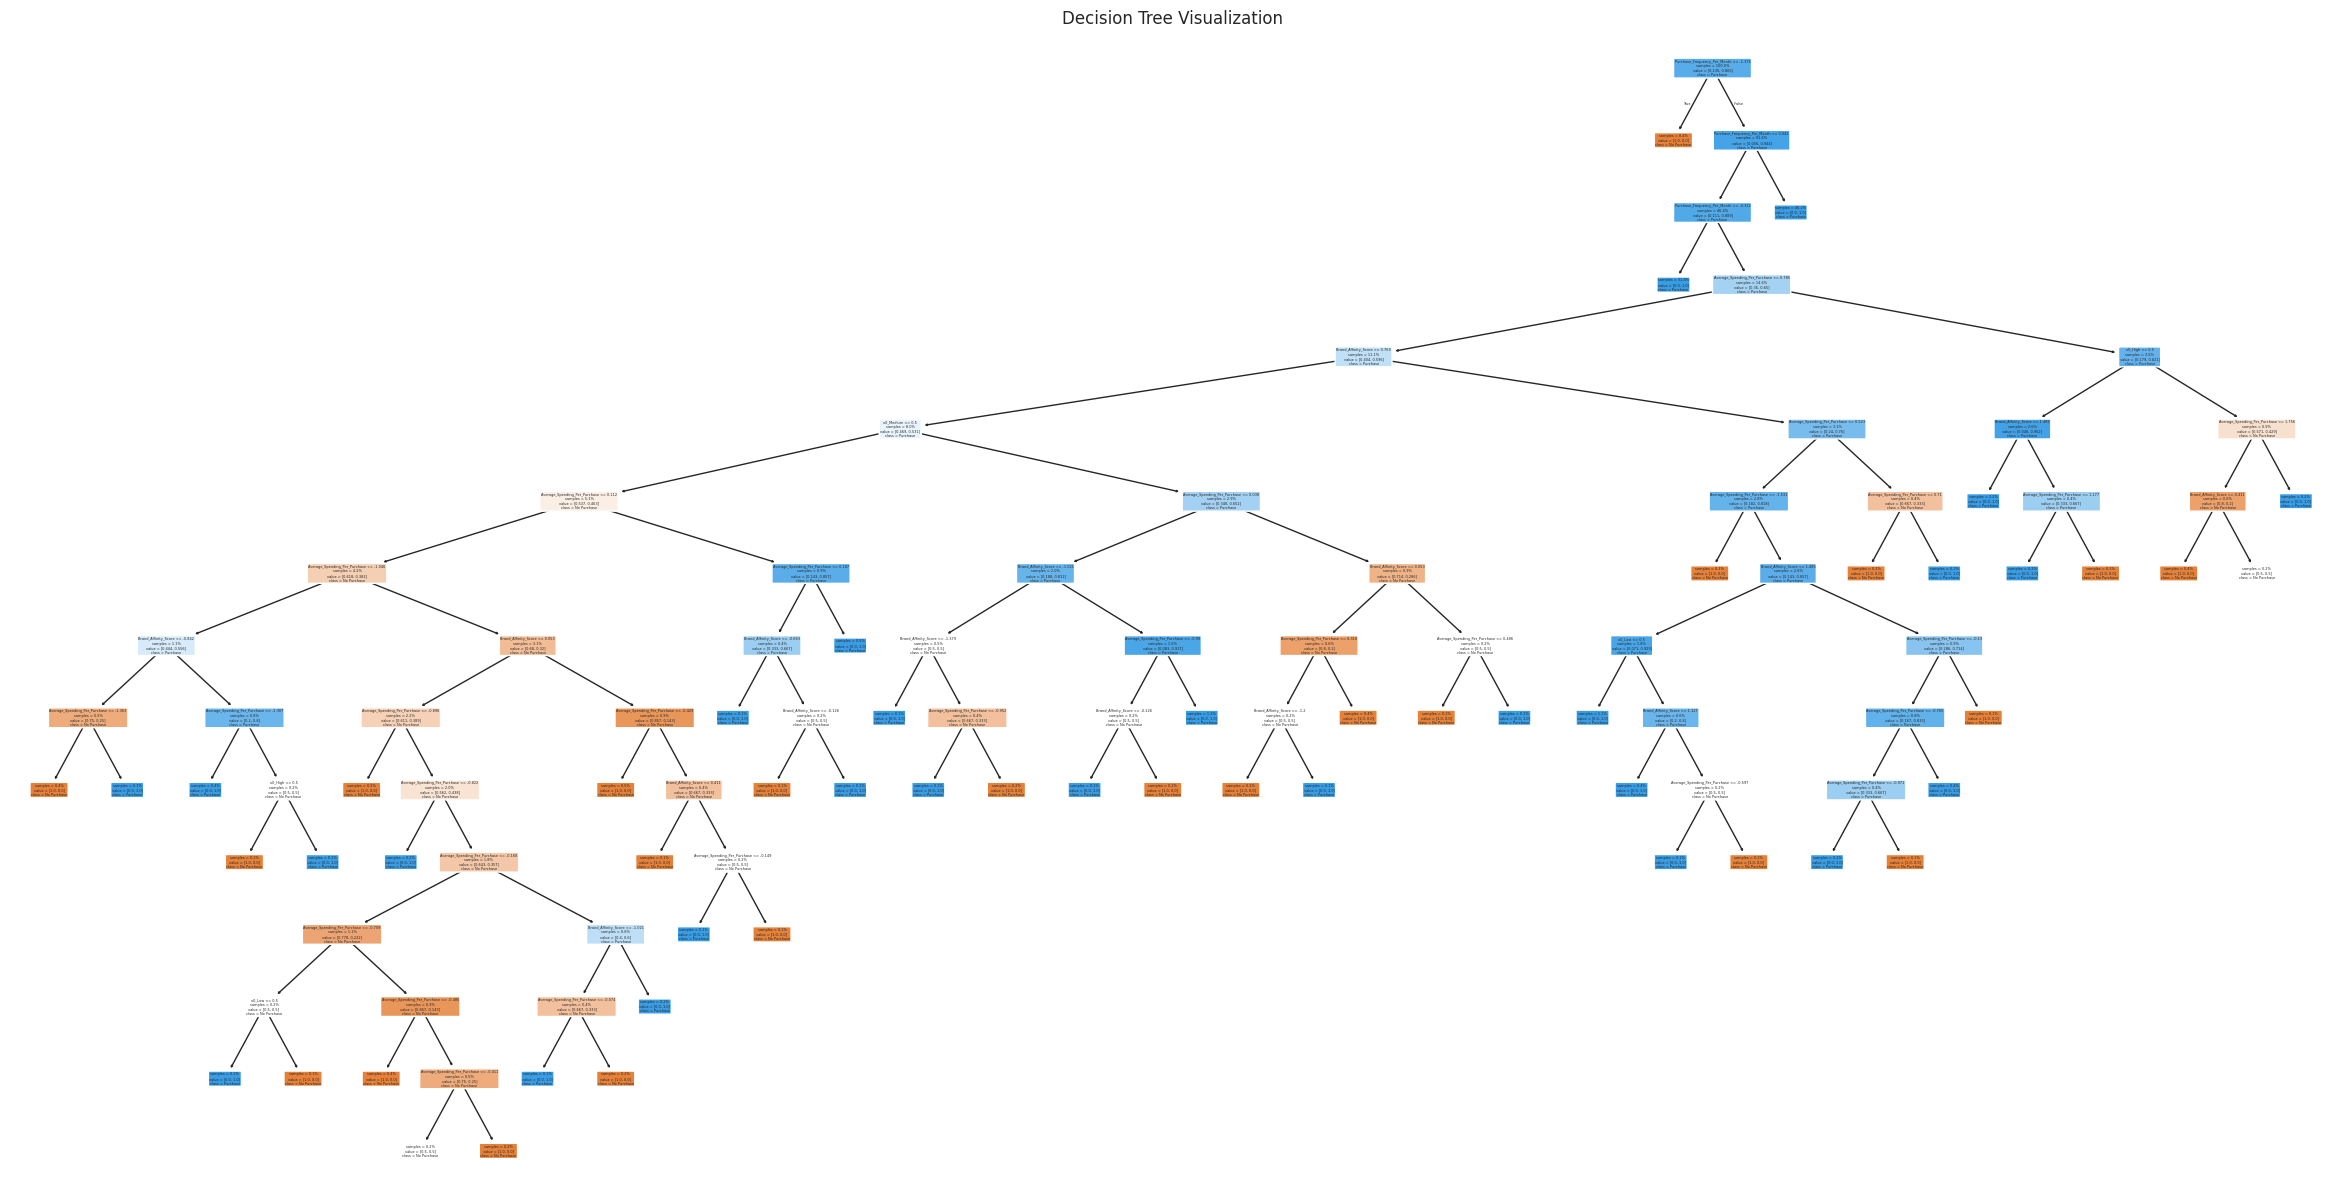

In [ ]:
# Access the trained Decision Tree
decision_tree = decision_tree_pipeline.named_steps['classifier']


categorical_features_encoded = decision_tree_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out()
feature_names = numeric_features + list(categorical_features_encoded)

# Plotting the Decision Tree
plt.figure(figsize=(30, 15))
plot_tree(decision_tree,
          feature_names=feature_names,
          class_names=['No Purchase', 'Purchase'],
          filled=True,
          impurity=False,
          proportion=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()



Feature Importance Visualization

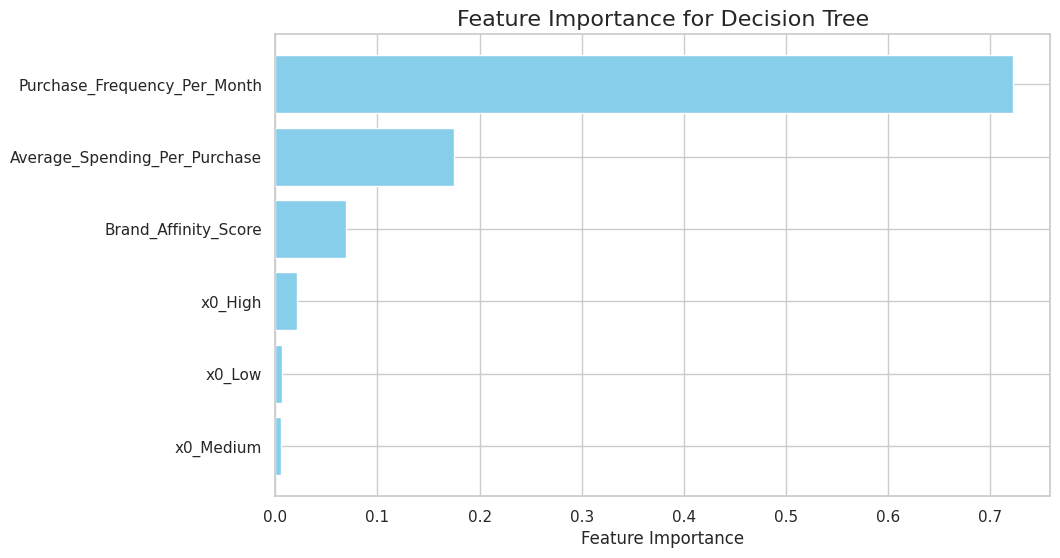

In [ ]:

importances = decision_tree.feature_importances_

# Sorting  features by importance
sorted_indices = importances.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance", fontsize=12)
plt.title("Feature Importance for Decision Tree", fontsize=16)
plt.gca().invert_yaxis()
plt.show()


